<a href="https://colab.research.google.com/github/ceska68/Atividades/blob/main/Bastien_Lize_Master_Semana1_Exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios

Vamos trabalhar com dados proveniente de duas fontes diferentes. Considere os dados do Índice de Desenvolvimento da Educação Básica (Ideb) disponíveis em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio) e os dados sobre Produto Interno Bruto (PIB) disponíveis em [PIB](https://basedosdados.org/dataset/br-ibge-pib?bdm_table=municipio).

No conjunto de dados `ideb.csv` vamos selecionar as colunas `ano`, `id_municipio`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` provenientes dos dados do Ideb, e as colunas `pib` e `impostos_liquidos` do `pib.csv`.

In [56]:
# importar pandas
import pandas as pd

# importar bases
df_ideb = pd.read_csv('ideb.csv')
df_pib = pd.read_csv('pib.csv')


### Atividade 1: Selecione apenas as colunas `ano`, `id_municipio`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` provenientes dos dados do Ideb, apenas para o ano de 2019 e agrupado por município.

In [57]:
# selecionar colunas
df_ideb = df_ideb[['ano','id_municipio','nota_saeb_matematica','nota_saeb_lingua_portuguesa','ideb']]

# selecionar ano 2019
df_ideb = df_ideb.loc[df_ideb['ano']==2019]

# agrupar por municipio
df_ideb_group = df_ideb.groupby('id_municipio').mean().reset_index()

# visualizar dados
df_ideb_group.head()

,id_municipio,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,1100015,2019.0,253.283750,242.246250,5.050000
1,1100023,2019.0,248.223750,243.618750,4.762500
2,1100031,2019.0,229.495000,221.500000,4.850000
3,1100049,2019.0,259.150000,249.888889,5.200000
4,1100056,2019.0,266.288571,254.334286,5.642857


In [59]:
# visualizar tamanho
df_ideb_group.shape

(5570, 5)

### Atividade 2: Selecione as colunas `ano`, `id_municipio`, `pib` e `impostos_liquidos` dos dados do PIB, para o ano de 2019 e agrupado por município.

In [61]:
# selecionar colunas
df_pib = df_pib[['ano','id_municipio','pib','impostos_liquidos']]

# filtrar ano 2019
df_pib = df_pib.loc[df_pib['ano']==2019]

# agrupar por municipio
df_pib_group = df_pib.groupby('id_municipio').mean().reset_index()

# visualizar dados
df_pib_group.head()

,id_municipio,ano,pib,impostos_liquidos
0,1100015,2019.0,4.956288e+08,29350985.0
1,1100023,2019.0,2.578830e+09,284397627.0
2,1100031,2019.0,1.399594e+08,5997974.0
3,1100049,2019.0,2.260644e+09,253988284.0
4,1100056,2019.0,5.068545e+08,76671376.0


In [62]:
# visualizar tamanho
df_pib_group.shape

(5570, 4)

### Atividade 3: Vamos juntar os dois DataFrames em um único. Para isso, vamos "unir" os dois dataframes pela variável `id_municipio`.

In [64]:
#juntar os dois df
df_join = pd.concat([df_pib_group,df_ideb_group], axis=1, join='inner')

# visualizar dados
df_join.head()

,id_municipio,ano,pib,impostos_liquidos,id_municipio,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,1100015,2019.0,4.956288e+08,29350985.0,1100015,2019.0,253.283750,242.246250,5.050000
1,1100023,2019.0,2.578830e+09,284397627.0,1100023,2019.0,248.223750,243.618750,4.762500
2,1100031,2019.0,1.399594e+08,5997974.0,1100031,2019.0,229.495000,221.500000,4.850000
3,1100049,2019.0,2.260644e+09,253988284.0,1100049,2019.0,259.150000,249.888889,5.200000
4,1100056,2019.0,5.068545e+08,76671376.0,1100056,2019.0,266.288571,254.334286,5.642857


In [65]:
# visualizar tamanho
df_join.shape

(5570, 9)

### Atividade 4:  Verifique se há dados faltantes, além disso verifique se há alguma coluna irrelevante. Se houver, descarte-a.

In [68]:
# checar dados faltantes
df_join.isna().sum()

id_municipio                    0
ano                             0
pib                             0
impostos_liquidos               0
id_municipio                    0
ano                             0
nota_saeb_matematica           21
nota_saeb_lingua_portuguesa    21
ideb                           21
dtype: int64

In [70]:
# deletar as linhas com NaN
df_join = df_join.dropna()

In [71]:
# checar dados faltantes
df_join.isna().sum()

id_municipio                   0
ano                            0
pib                            0
impostos_liquidos              0
id_municipio                   0
ano                            0
nota_saeb_matematica           0
nota_saeb_lingua_portuguesa    0
ideb                           0
dtype: int64

### Atividade 5: Quais são os tipos das variáveis do DataFrame?

id_municipio: nominal                                                
ano: ordinal                                              
pib: contínua                                              
impostos_liquidos: contínua                                              
nota_saeb_matematica: contínua                                              
nota_saeb_lingua_portuguesa: contínua                                          
ideb: contínua                                             

In [77]:
#transformar 'id_municipio' em string por ser nominal
df_join['id_municipio'] = df_join['id_municipio'].astype('str')

#transformar 'ano' em inteiro por ser ordinal
df_join['ano'] = df_join['ano'].astype('int')

#visualizar tipos
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5549 entries, 0 to 5569
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_municipio                 5549 non-null   object 
 1   ano                          5549 non-null   int64  
 2   pib                          5549 non-null   float64
 3   impostos_liquidos            5549 non-null   float64
 4   nota_saeb_matematica         5549 non-null   float64
 5   nota_saeb_lingua_portuguesa  5549 non-null   float64
 6   ideb                         5549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 346.8+ KB


### Atividade 6: Observando as variáveis envolvidas, você acha que deve existir alguma correlação entre quais delas?

Será que municípios com alta nota no Ideb possuem um PIB alto?

In [78]:
# importar seaborn
import seaborn as sns

<Axes: xlabel='pib', ylabel='ideb'>

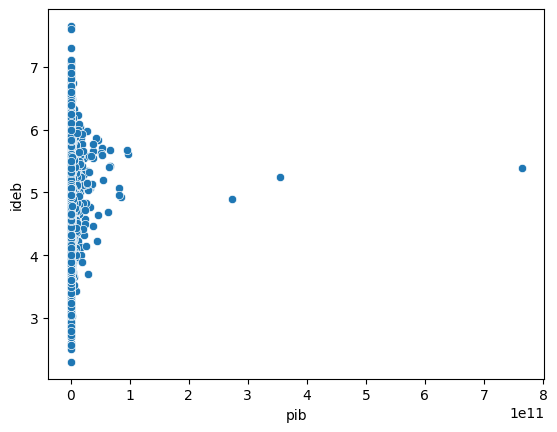

In [79]:
# criar gráfico scatterplot
sns.scatterplot(data=df_join, x='pib', y='ideb')

In [82]:
# calcular correlação
df_join[['pib','ideb']].corr()

,pib,ideb
pib,1.000000,0.037105
ideb,0.037105,1.000000


### O que significa a correlação das variáveis `id_municipio` e `ideb`?

Resposta: Por ser muito próxima de 0 (0,037) conclui-se que não há correlação entre elas.

### Atividade 7: Vamos importar os dados de [Estatística de Segurança Pública do Rio de Janeiro](https://basedosdados.org/dataset/br-isp-estatisticas-seguranca?bdm_table=taxa_evolucao_mensal_uf) e procurar por correlações entre algumas das colunas.

In [90]:
# importar base
df_seg_rj = pd.read_csv('seg_rj.csv')

# visualizar dados
df_seg_rj.head()

,ano,mes,mes_ano,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,2003,1,2003m01,4.01,0.04,0.14,4.19,0.61,4.80,2.48,...,NaN,NaN,41.71,2.78,0.98,0.02,NaN,NaN,304.90,3.0
1,2003,2,2003m02,3.97,0.03,0.08,4.08,0.76,4.83,2.46,...,NaN,NaN,41.16,2.89,1.27,0.03,NaN,NaN,309.05,3.0
2,2003,3,2003m03,4.17,0.03,0.11,4.32,0.77,5.08,2.26,...,NaN,NaN,39.43,3.14,1.06,0.05,NaN,NaN,309.13,3.0
3,2003,4,2003m04,3.98,0.07,0.10,4.15,0.85,5.00,2.02,...,NaN,NaN,38.29,2.35,0.82,0.03,NaN,NaN,300.72,3.0
4,2003,5,2003m05,4.08,0.04,0.14,4.25,0.65,4.91,2.59,...,NaN,NaN,37.00,2.84,1.00,0.03,NaN,NaN,310.15,3.0


### Atividade 8: Selecione os dados apenas para o ano de 2020 e apenas as colunas `mês`, `hom_doloso, lesao_corp_morte, latrocinio, cvli, hom_por_interv_policial`, e `trafico_drogas`

In [94]:
# filtrar ano 2020
df_seg_rj = df_seg_rj.loc[df_seg_rj['ano']==2020]

# visualizar dados
df_seg_rj.head()

,ano,mes,mes_ano,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
204,2020,1,2020m01,2.07,0.02,0.05,2.14,0.90,3.04,2.59,...,7.71,1.53,28.54,2.31,0.21,0.01,4.53,0.00,379.53,3.0
205,2020,2,2020m02,1.88,0.01,0.06,1.95,0.95,2.90,2.43,...,6.87,1.40,26.80,2.18,0.23,0.01,2.26,0.00,362.79,3.0
206,2020,3,2020m03,2.16,0.01,0.05,2.22,0.66,2.88,2.08,...,5.27,1.04,18.71,1.57,0.09,0.00,4.53,0.00,287.41,3.0
207,2020,4,2020m04,1.80,0.03,0.03,1.86,1.03,2.89,1.87,...,3.14,0.01,12.78,1.03,0.15,0.02,2.26,0.00,189.23,3.0
208,2020,5,2020m05,1.57,0.00,0.03,1.61,0.75,2.36,1.68,...,3.96,0.03,13.26,1.04,0.09,0.02,0.00,11.17,201.75,3.0


In [95]:
#selecionar colunas
df_seg_rj = df_seg_rj[['mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli', 'hom_por_interv_policial', 'trafico_drogas']]

# visualizar dados
df_seg_rj.head()

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,trafico_drogas
204,1,2.07,0.02,0.05,2.14,0.90,5.06
205,2,1.88,0.01,0.06,1.95,0.95,5.06
206,3,2.16,0.01,0.05,2.22,0.66,4.70
207,4,1.80,0.03,0.03,1.86,1.03,5.29
208,5,1.57,0.00,0.03,1.61,0.75,5.39


In [96]:
# checar dados faltantes
df_seg_rj.isna().sum()

mes                        0
hom_doloso                 0
lesao_corp_morte           0
latrocinio                 0
cvli                       0
hom_por_interv_policial    0
trafico_drogas             0
dtype: int64

<Axes: >

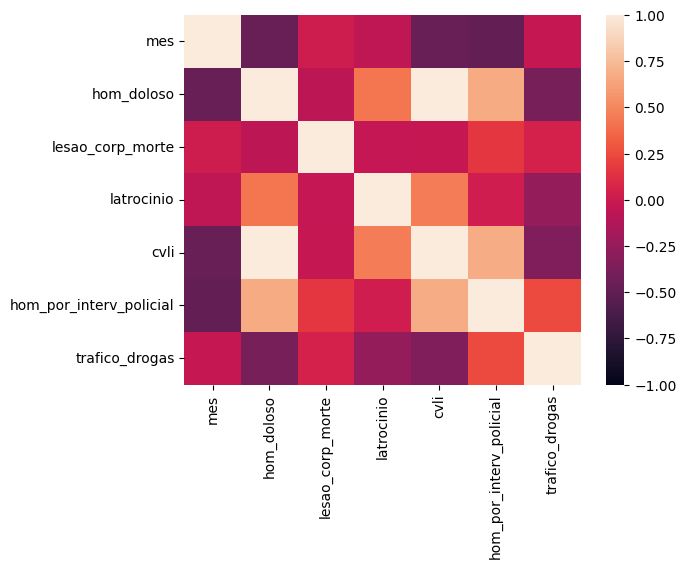

In [97]:
#criar mapa de calor de correlação
sns.heatmap(df_seg_rj.corr('spearman'),vmin=-1, vmax=1)

In [101]:
#calcular correlações
df_seg_rj.corr('spearman')

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,trafico_drogas
mes,1.000000,-0.468531,0.011427,-0.061063,-0.461538,-0.489510,-0.028070
hom_doloso,-0.468531,1.000000,-0.064753,0.423852,0.993007,0.664336,-0.396494
lesao_corp_morte,0.011427,-0.064753,1.000000,-0.031304,-0.026663,0.159977,0.053513
latrocinio,-0.061063,0.423852,-0.031304,1.000000,0.456180,0.017960,-0.252321
cvli,-0.461538,0.993007,-0.026663,0.456180,1.000000,0.678322,-0.357897
hom_por_interv_policial,-0.489510,0.664336,0.159977,0.017960,0.678322,1.000000,0.249124
trafico_drogas,-0.028070,-0.396494,0.053513,-0.252321,-0.357897,0.249124,1.000000


Existe forte correlação positiva entre cvli e hom_doloso, representada por um índice de 0,99 (muito próximo de 1).